![Github_top](https://user-images.githubusercontent.com/33735397/206313977-e67ba652-3340-4a1b-b1d1-141d8d5001f2.PNG)


# Community Streamflow Evaluation System (CSES)

National-scale streamflow modeling remains a modern challenge, as changes in the underlying hydrology from land use and land cover (LULC) change, anthropogentic streamflow modification, and general process components (reach length, hydrogeophysical processes, precipitation, temperature, etc) greatly influence  hydrological modeling.
In a changing climate, there is a need to anticipate flood intensity, impacts of groundwater depletion on streamflow, western montain low-flow events, eastern rain-on-snow events, storm-induced flooding, and other severe environmental problems that challenge the management of water resources.
Given the National Water Model (NWM) bridges the gap between the spatially coarse USGS streamflow observations by providing a near-continuous 2.7 million reach predictions of streamflow, there lies the potential to improve upon the capabilities of the model by characterizing predictive performance across the heterogeneity of proces ses and land covers present at the national scale. 
The python-based Community Streamflow Evaluation System (CSES) package provides a tool to evaluate national hydrogrphy dataset (NHD) based model outputs with colocated USGS/NWIS streamflow monitorng stations (parameter: 060). 
The package contains three key methods for evaluation: State-based LULC analysis, HUC level analysis, and USGS station-based reach analysis.
Below is a description of each method and application.
While designed to us the NWM version 2.1 retrospective dataset, with minimal modification the tool should be able to take in other model formulations.
By using the CSES, researchers can identify locations where a model may benefit from further training/calibration/parameterization or a need for new model processes/features (e.g., integration of reservoir release operaitons) to ultimately create new post-processing methods and/or hydrological modeling formulations to improve streamflow prediction capabilities with respect to modeling needs (e.g., stormflow, supply, emergency management, flooding, etc).   


In [1]:
import ROSET_AWS
import os
import warnings
warnings.filterwarnings("ignore")
#set path directory
cwd = os.getcwd()

# Streamflow evaluation: HUC Class

This section of code allows the user to evaluate modeled streamflow with observed in situ NWIS monitoring sites 
for a watershed(s) of interest. The user can input multiple watersheds (e.g., Great Salt lake: ['1601', '1602']).
Enter a start date, end date, watersheds and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent

Use [The National Map Watershed Boundary Dataset (WBD)]() to identify the HUC size and unit code of interestto locate HUC of interest.

![HUC_Eval_top](https://user-images.githubusercontent.com/33735397/206322410-ea0e210c-c805-4599-ad6b-704c76ba42ce.PNG)


In [2]:
#Enter a starting date, model for evaluation, and the respectrive HUC id(s)

startDT ='2015-4-01'
endDT ='2015-10-31'
model = 'NWM_v2.1'
HUCids = ['1601', '1602'] #must be in brackets, add multiple HUCs to complete a watershed (e.g. GSL basin), East vs. West. etc
#0802 causing issues, is the state there?
#Initiate function
HUC_Eval = ROSET_AWS.HUC_Eval(model, HUCids, startDT, endDT, cwd)


In [1]:
#Match NWIS locations within HUC watershed
HUC_Eval.Join_WBD_StreamStats()

In [2]:
#Get NWM reaches for each NWIS monitoring station
HUC_Eval.get_NHD_Model_info()

#Get NWM and NWIS data to compare
HUC_Eval.prepare_comparison() # run the apply function to not have to run it during evaluation

## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [3]:
#Run Map function
HUC_Eval.Map_Plot_Eval('M', supply = False)

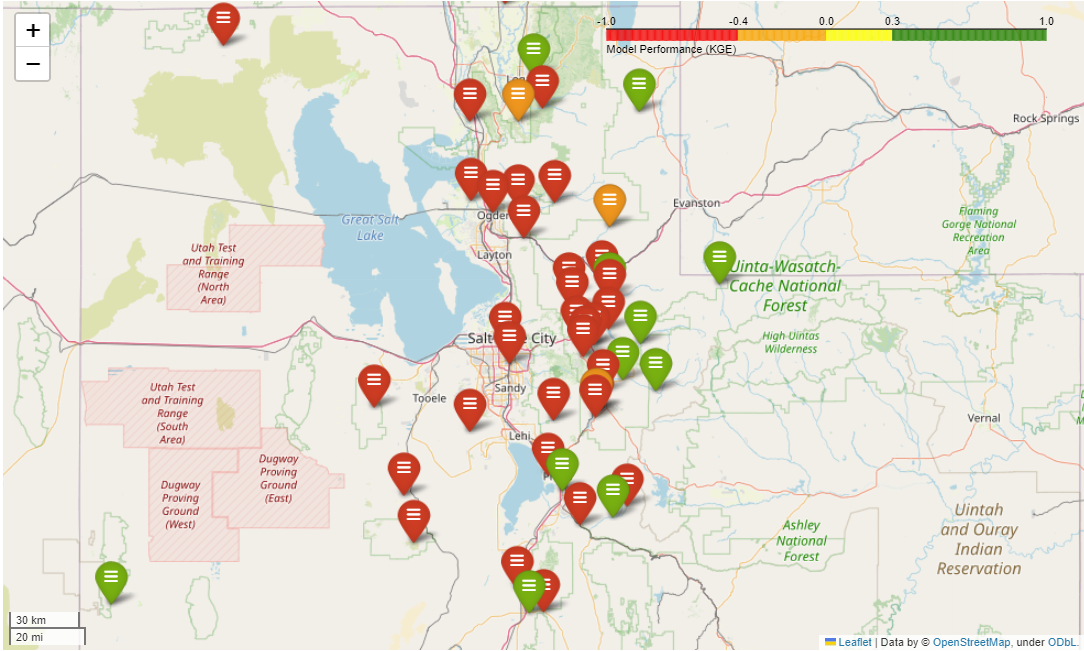

## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [4]:
#Plot evaluation
HUC_Eval.Interactive_Model_Eval('M', supply = False)

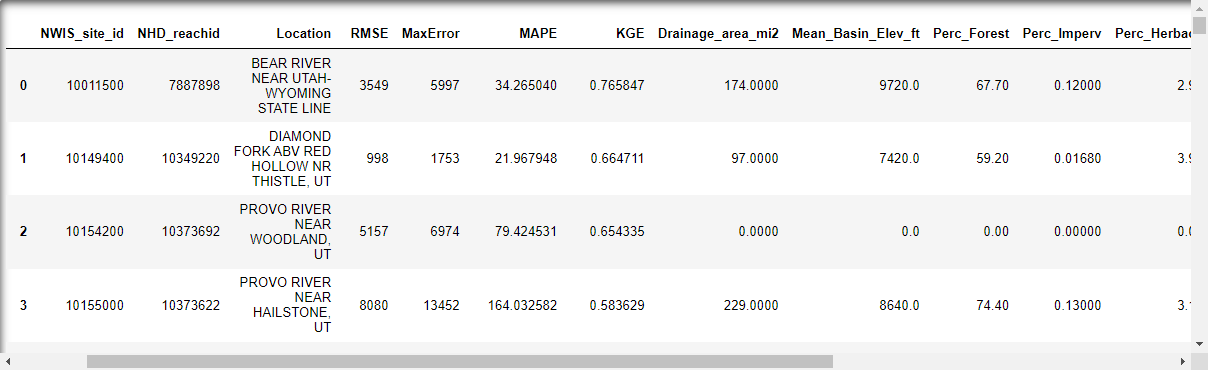

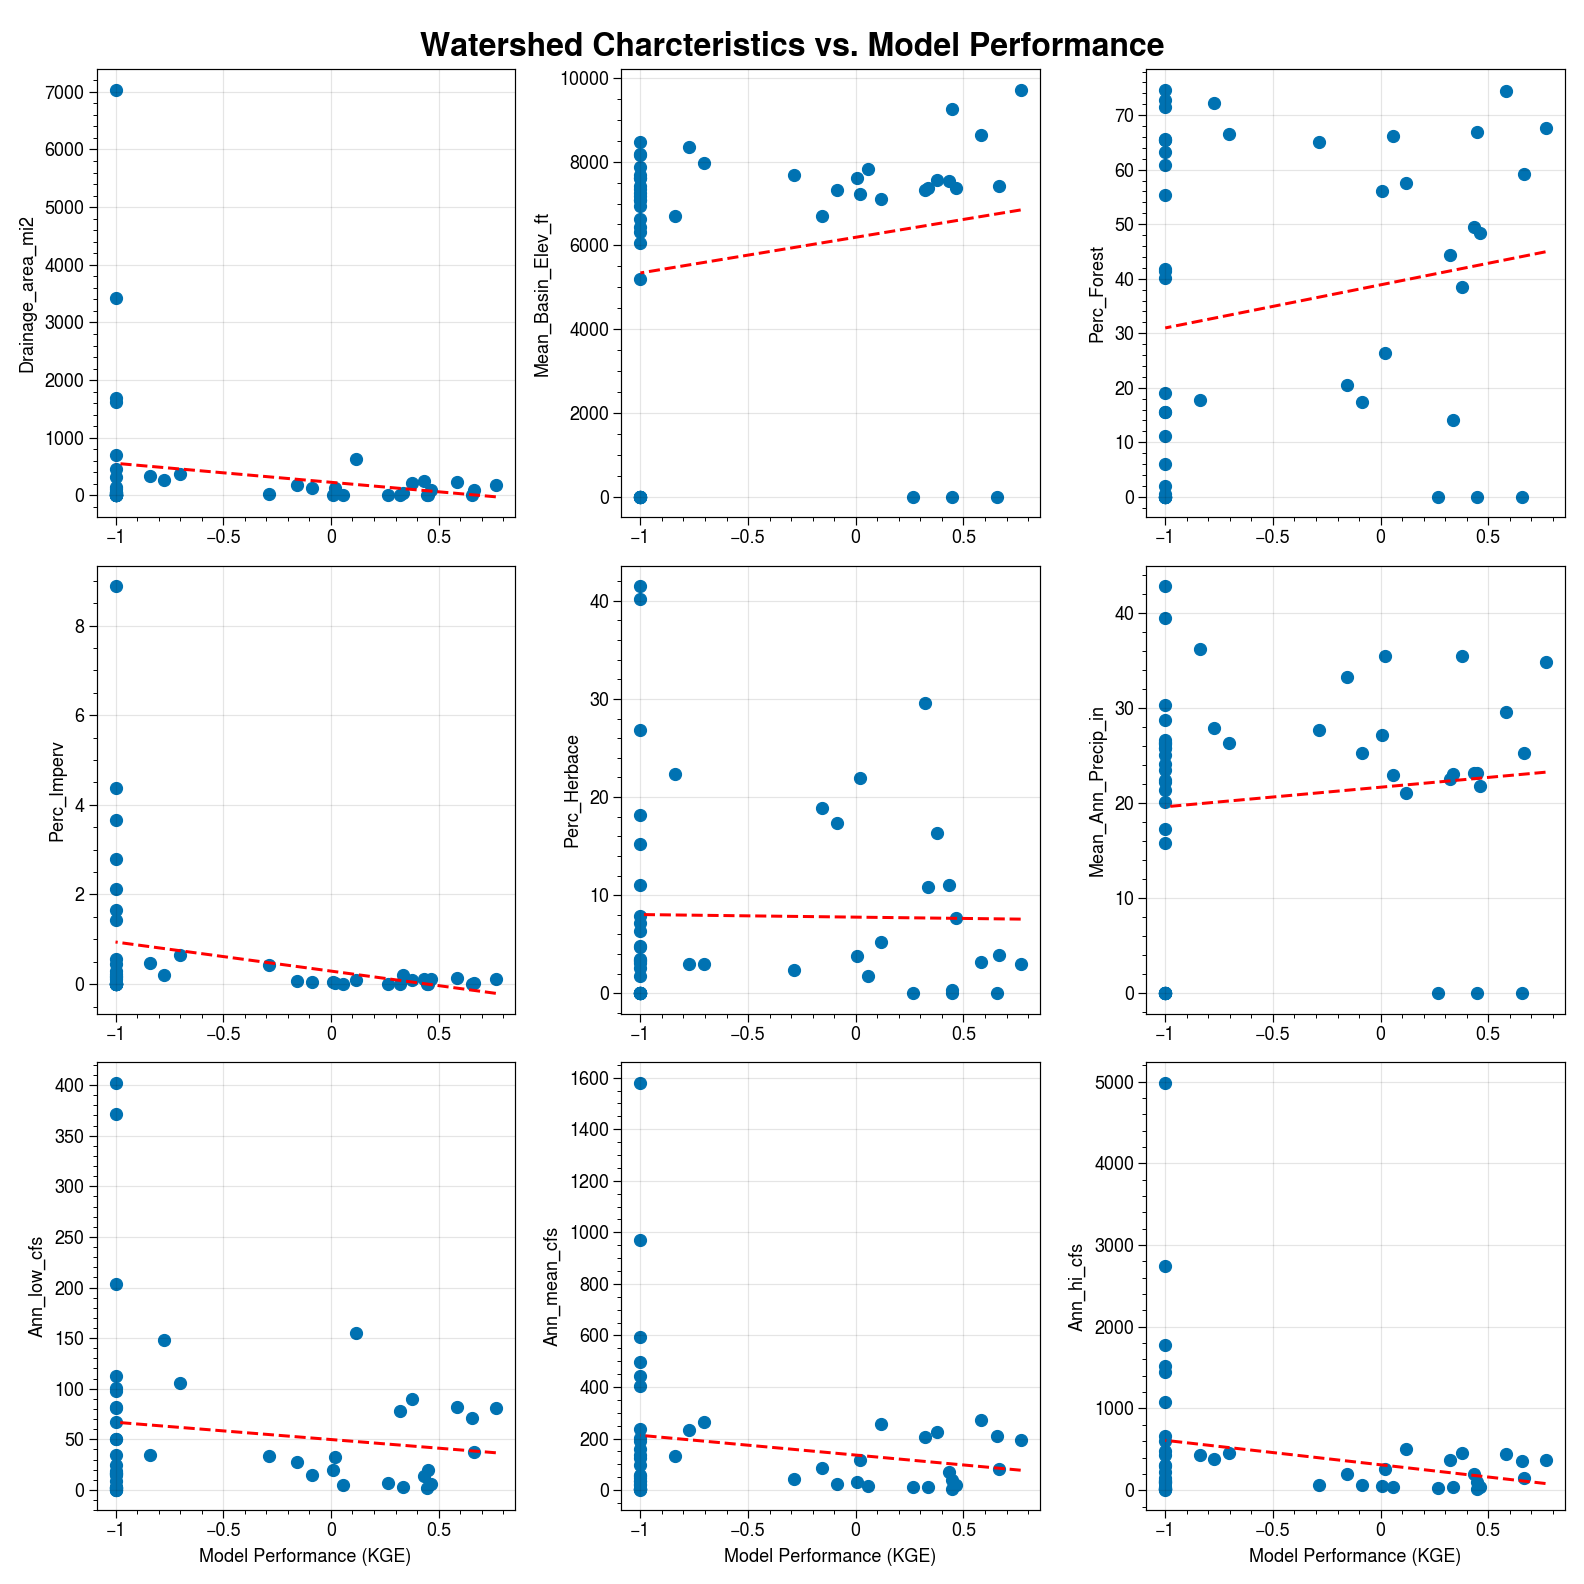

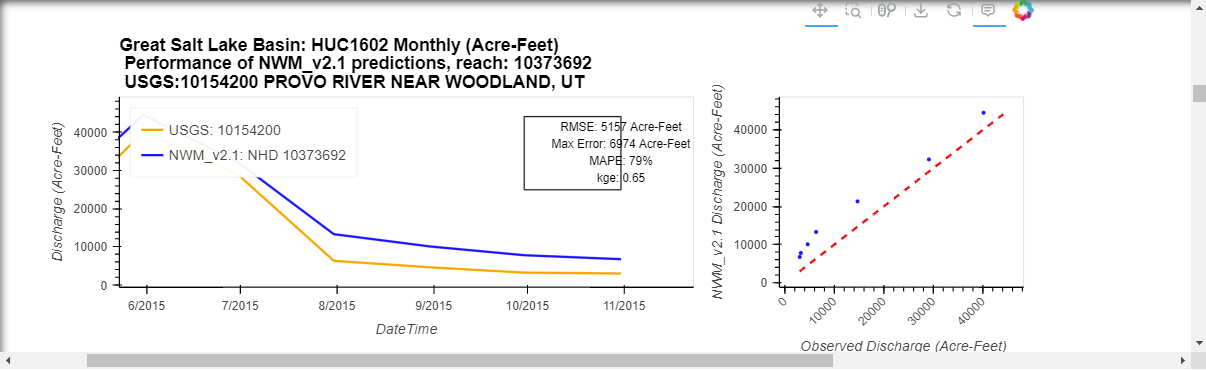